In [4]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
#convert the string list in the job skills column to a list
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [5]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")]


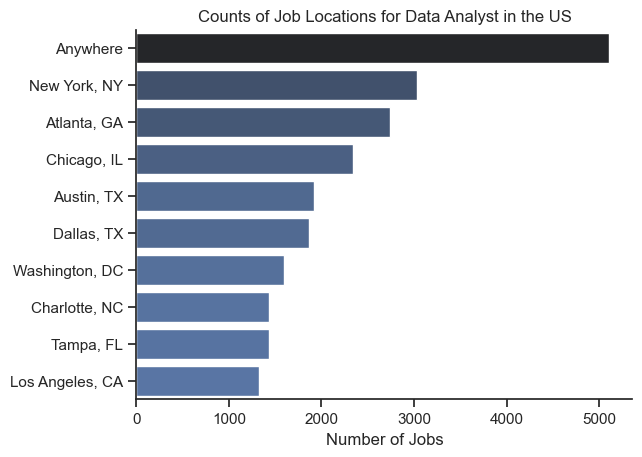

In [14]:
#to_frame() transforms the table into a dataframe
df_plot = df_DA_US["job_location"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="job_location", hue="count", palette="dark:b_r", legend=False)
plt.title("Counts of Job Locations for Data Analyst in the US")
plt.ylabel("")
plt.xlabel("Number of Jobs")
sns.despine()
plt.show()

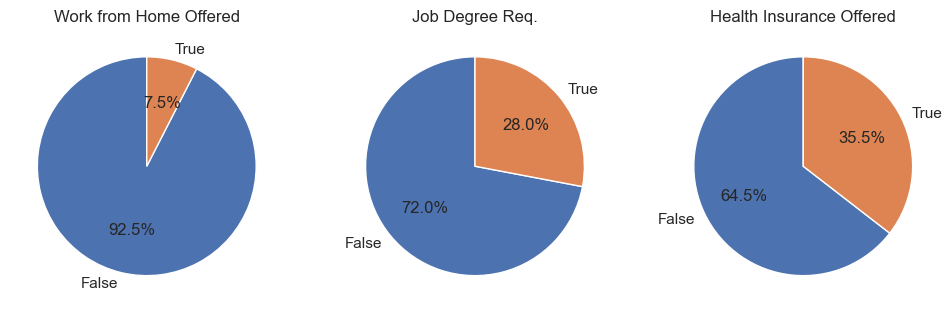

In [16]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

dict_column = {
    "job_work_from_home": "Work from Home Offered",
    "job_no_degree_mention": "Job Degree Req.",
    "job_health_insurance": "Health Insurance Offered"
}

#.items returns a list of tuples for each key-value pair, so we can get the index from enumerate with also the dataframe column and the job title for each respective column
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct="%1.1f%%", labels=["False", "True"])
    ax[i].set_title(title)

plt.show()

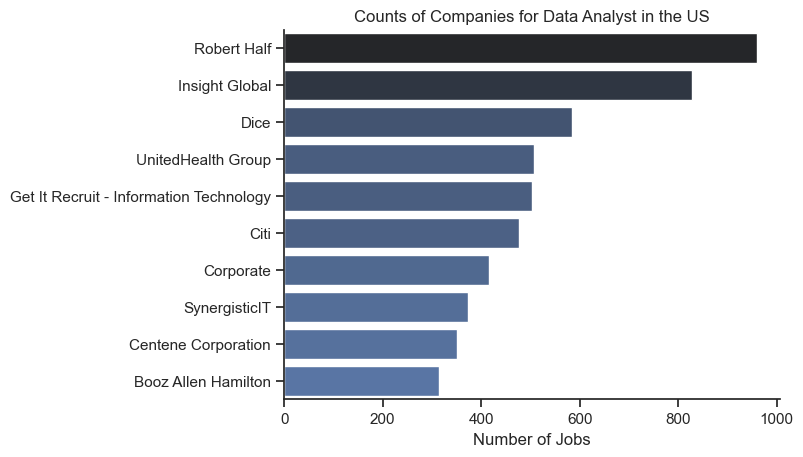

In [17]:
#whenever I need to change a variable or column name that shows up multiple times, do Cmd + Shift + L to select all of them and then I can edit them all at once
df_plot = df_DA_US["company_name"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)
plt.title("Counts of Companies for Data Analyst in the US")
plt.ylabel("")
plt.xlabel("Number of Jobs")
sns.despine()
plt.show()